notes : use SVHN (Street View House Numbers) later in torchvision.Datasets

In [85]:
import torch
from torch import nn

In [86]:
import torchvision
import torchvision.datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [87]:
print(f" PyTorch version : {torch.__version__}")
print(f" Torchvision version : {torchvision.__version__}")

 PyTorch version : 2.1.1+cpu
 Torchvision version : 0.16.1+cpu


## Step 01 : Prepare the data
**Dataset** : We weill use the **FashionMNIST** dataset

In [88]:
# setup the training data
train_data = torchvision.datasets.FashionMNIST(
    root="fashiondata",  # where to download data to?
    train=True,  # this is training data
    download=True,  # download data if it's not present
    transform=ToTensor(),  # they come in PIL format, we transform them to Pt tensors
    target_transform=None,
)  # not tranform the targets

In [89]:
# setup the testing data
test_data = torchvision.datasets.FashionMNIST(
    root="fashiondata",  # where to download data to?
    train=False,  # get the test data
    download=True,  # download data if it's not present
    transform=ToTensor(),  # they come in PIL format, we transform them to Pt tensors
)

In [90]:
# let's check a sample of the training data
img, label = train_data[0]
print(f"The image is of shape {img.shape} and the label is {label}")

The image is of shape torch.Size([1, 28, 28]) and the label is 9


**[color_channels=1, height=28, width=28]**

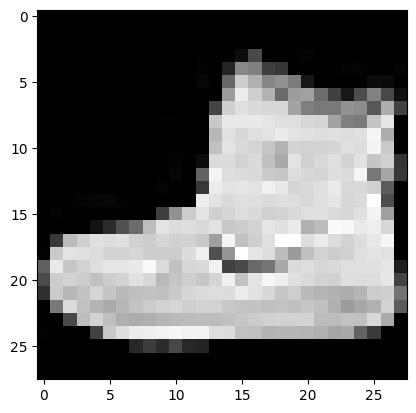

In [91]:
plt.imshow(img.squeeze(), cmap="gray")

In [92]:
images = train_data.data
first_samples = images[:16]
print(len(first_samples))

16


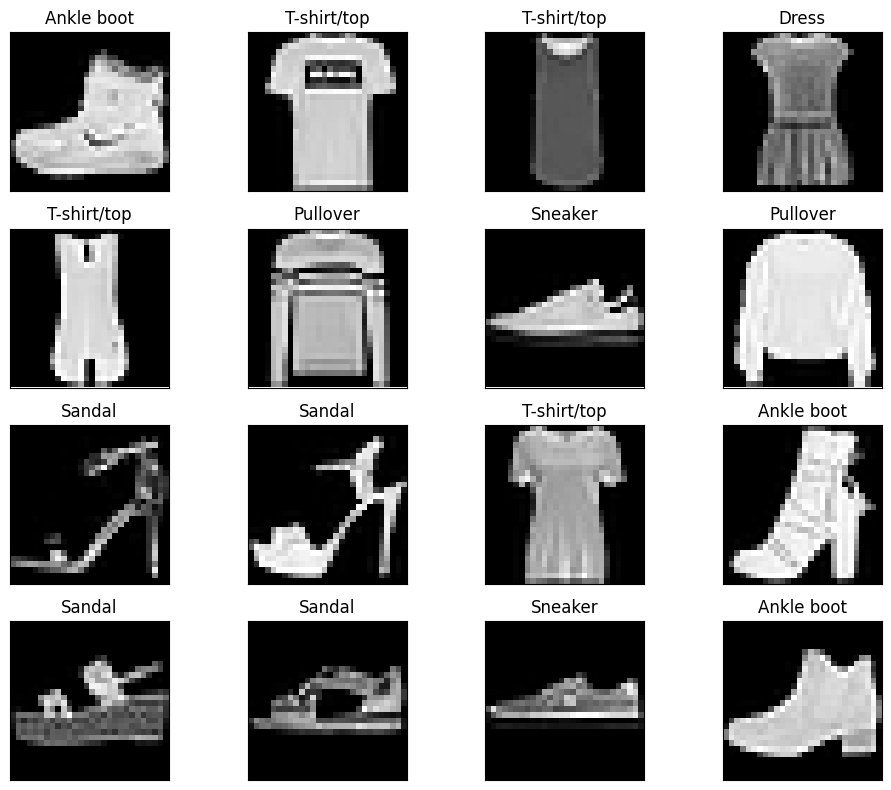

In [93]:
rows = 4
cols = 4
fig, ax = plt.subplots(rows, cols, figsize=(10, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(first_samples[i], cmap="gray")
    axi.set_title(train_data.classes[train_data.targets[i].item()])
    axi.set_xticks([])
    axi.set_yticks([])

plt.tight_layout()
plt.show()

Now let's see how many train and test data we have

In [94]:
print(f"We have {len(train_data)} training samples and {len(test_data)} test samples")

We have 60000 training samples and 10000 test samples


Let's check the classes we got

In [95]:
classes_names = train_data.classes
print(f"We have {len(classes_names)} classes \nClasses : \n{classes_names}")

We have 10 classes 
Classes : 
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


We have a multiclass classification

## Step 02 : Prepare the dataloader

It helps load data into a model for training and for inference.

It turns a large Dataset into a Python iterable of smaller chunks called batches because it's more compatitionally efficient

In [96]:
# we start with a batch size of 32
from torch.utils.data import DataLoader

BATCH_SIZE = 32
training_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
testing_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [97]:
print(
    f"Length of training dataloader : {len(training_dataloader)} batches of {BATCH_SIZE}"
)
print(
    f"Length of testing dataloader : {len(testing_dataloader)} batches of {BATCH_SIZE}"
)

Length of training dataloader : 1875 batches of 32
Length of testing dataloader : 313 batches of 32


In [98]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(training_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [130]:
for batch, (X, y) in enumerate(training_dataloader):
    print(f"Batch: {batch} | Shape of X [N, C, H, W]: {X.shape} | Shape of y: {y.shape}")

Batch: 0 | Shape of X [N, C, H, W]: torch.Size([32, 1, 28, 28]) | Shape of y: torch.Size([32])
Batch: 1 | Shape of X [N, C, H, W]: torch.Size([32, 1, 28, 28]) | Shape of y: torch.Size([32])
Batch: 2 | Shape of X [N, C, H, W]: torch.Size([32, 1, 28, 28]) | Shape of y: torch.Size([32])
Batch: 3 | Shape of X [N, C, H, W]: torch.Size([32, 1, 28, 28]) | Shape of y: torch.Size([32])
Batch: 4 | Shape of X [N, C, H, W]: torch.Size([32, 1, 28, 28]) | Shape of y: torch.Size([32])
Batch: 5 | Shape of X [N, C, H, W]: torch.Size([32, 1, 28, 28]) | Shape of y: torch.Size([32])
Batch: 6 | Shape of X [N, C, H, W]: torch.Size([32, 1, 28, 28]) | Shape of y: torch.Size([32])
Batch: 7 | Shape of X [N, C, H, W]: torch.Size([32, 1, 28, 28]) | Shape of y: torch.Size([32])
Batch: 8 | Shape of X [N, C, H, W]: torch.Size([32, 1, 28, 28]) | Shape of y: torch.Size([32])
Batch: 9 | Shape of X [N, C, H, W]: torch.Size([32, 1, 28, 28]) | Shape of y: torch.Size([32])
Batch: 10 | Shape of X [N, C, H, W]: torch.Size([3

## Setp 03 : Building a base model

In [132]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [133]:
# create a flatten model 
flatten_model = nn.Flatten()
x = train_features_batch[0]
output = flatten_model(x)
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")


Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [134]:
    
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [135]:
torch.manual_seed(19)
model0 = FashionMNISTModelV0(input_shape=28*28, hidden_units=10, output_shape=len(classes_names))
# we have 784 pixels in each image and we have 10 classes so 10 hidden units
model0.to('cpu')

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [136]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [137]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model0.parameters(), lr=0.1)

In [138]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.


    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [139]:
training_dataloader.__dict__

{'dataset': Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: fashiondata
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 'num_workers': 0,
 'prefetch_factor': None,
 'pin_memory': False,
 'pin_memory_device': '',
 'timeout': 0,
 'worker_init_fn': None,
 '_DataLoader__multiprocessing_context': None,
 '_dataset_kind': 0,
 'batch_size': 32,
 'drop_last': False,
 'sampler': <torch.utils.data.sampler.RandomSampler at 0x2957871a110>,
 'batch_sampler': <torch.utils.data.sampler.BatchSampler at 0x295746a3dc0>,
 'generator': None,
 'collate_fn': <function torch.utils.data._utils.collate.default_collate(batch)>,
 'persistent_workers': False,
 '_DataLoader__initialized': True,
 '_IterableDataset_len_called': None,
 '_iterator': None}

In [140]:
print(training_dataloader.__doc__)


    Data loader. Combines a dataset and a sampler, and provides an iterable over
    the given dataset.

    The :class:`~torch.utils.data.DataLoader` supports both map-style and
    iterable-style datasets with single- or multi-process loading, customizing
    loading order and optional automatic batching (collation) and memory pinning.

    See :py:mod:`torch.utils.data` documentation page for more details.

    Args:
        dataset (Dataset): dataset from which to load the data.
        batch_size (int, optional): how many samples per batch to load
            (default: ``1``).
        shuffle (bool, optional): set to ``True`` to have the data reshuffled
            at every epoch (default: ``False``).
        sampler (Sampler or Iterable, optional): defines the strategy to draw
            samples from the dataset. Can be any ``Iterable`` with ``__len__``
            implemented. If specified, :attr:`shuffle` must not be specified.
        batch_sampler (Sampler or Iterable, opti

The traning loss and test loss will be calculated on a batch level

In [142]:
# import a prgogress bar
from tqdm.auto import tqdm
torch.manual_seed(19)
training_time_start_on_cpu = timer()
epochs : int = 10
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    
    # ==========TRAINING============
    training_loss = 0
    # iterate over the 1875 batches of the dataloader
    for batch, (X, y) in enumerate(training_dataloader):
        model0.train()    
        # perform forward pass
        # same as y_pred = model0.forwardpass(X)
        y_pred = model0(X) # because the instance is callable
        # get the batch loss
        loss = loss_fn(y_pred, y)
        training_loss += loss
        # optimizer
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(training_dataloader.dataset)} samples.")
    # get the average loss per batch
    training_loss /= len(training_dataloader)
    
    # ========TESTING=======
    testing_loss = 0
    testing_accuracy = 0
    model0.eval()
    with torch.inference_mode():
        # iterate over the 1875 batches of the dataloader
        for batch, (X, y) in enumerate(testing_dataloader):
            # perform forward pass
            # same as y_pred = model0.forwardpass(X)
            test_pred = model0(X)
            # get the batch loss
            test_loss = loss_fn(test_pred, y)
            testing_loss += test_loss
            # get the accuracy
            test_pred_labels = torch.argmax(torch.softmax(test_pred, dim=1), dim=1)
            testing_accuracy += accuracy_fn(y_true=y, y_pred=test_pred_labels)
            
        # get the average loss per batch
        testing_loss /= len(testing_dataloader)
        testing_accuracy /= len(testing_dataloader)

    print(f"\nTraining loss: {training_loss:.5f} | Testing loss: {testing_loss:.5f} | Testing accuracy: {testing_accuracy:.2f}%\n")
    training_time_end_on_cpu = timer()
    total_training_time_model0 = print_train_time(start=training_time_start_on_cpu, end=training_time_end_on_cpu, device=device)
    
        

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
---------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 10%|█         | 1/10 [00:09<01:24,  9.43s/it]


Training loss: 0.43075 | Testing loss: 0.44672 | Testing accuracy: 84.35%

Train time on cpu: 9.437 seconds
Epoch: 1
---------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 20%|██        | 2/10 [00:18<01:13,  9.13s/it]


Training loss: 0.42561 | Testing loss: 0.51898 | Testing accuracy: 81.69%

Train time on cpu: 18.355 seconds
Epoch: 2
---------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 30%|███       | 3/10 [00:27<01:03,  9.06s/it]


Training loss: 0.42189 | Testing loss: 0.47649 | Testing accuracy: 83.27%

Train time on cpu: 27.336 seconds
Epoch: 3
---------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 40%|████      | 4/10 [00:36<00:54,  9.03s/it]


Training loss: 0.42067 | Testing loss: 0.44874 | Testing accuracy: 84.14%

Train time on cpu: 36.304 seconds
Epoch: 4
---------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 50%|█████     | 5/10 [00:45<00:44,  8.93s/it]


Training loss: 0.41528 | Testing loss: 0.50388 | Testing accuracy: 82.22%

Train time on cpu: 45.078 seconds
Epoch: 5
---------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 60%|██████    | 6/10 [00:54<00:35,  8.98s/it]


Training loss: 0.41443 | Testing loss: 0.45102 | Testing accuracy: 84.26%

Train time on cpu: 54.153 seconds
Epoch: 6
---------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 70%|███████   | 7/10 [01:03<00:27,  9.09s/it]


Training loss: 0.41316 | Testing loss: 0.45702 | Testing accuracy: 83.89%

Train time on cpu: 63.452 seconds
Epoch: 7
---------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 80%|████████  | 8/10 [01:12<00:18,  9.09s/it]


Training loss: 0.41169 | Testing loss: 0.47422 | Testing accuracy: 83.17%

Train time on cpu: 72.551 seconds
Epoch: 8
---------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 90%|█████████ | 9/10 [01:21<00:09,  9.18s/it]


Training loss: 0.40997 | Testing loss: 0.46057 | Testing accuracy: 83.86%

Train time on cpu: 81.914 seconds
Epoch: 9
---------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


100%|██████████| 10/10 [01:30<00:00,  9.08s/it]


Training loss: 0.40743 | Testing loss: 0.48081 | Testing accuracy: 83.00%

Train time on cpu: 90.809 seconds
